In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_and_clean(path):
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()
    for col in df.select_dtypes(include=["object"]).columns:
        df[col] = df[col].str.strip()
    df = df[df["epoch"] != "N/A"]
    df["epoch"] = df["epoch"].astype(int)
    numeric_cols = ["auc", "c@1", "f_05_u", "F1", "brier", 
                    "overall", "sub_overall", "PAN20_overall"]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col])
    return df


def plot_metrics(df_hedged, df_true, metrics, title):
    # Adapted from
    # https://www.skillcamper.com/lesson/seaborn-part-2
    # sns.set(style="whitegrid")
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    global_min = float('inf')
    global_max = float('-inf')
    for metric in metrics:
        min_val = min(df_hedged[metric].min(), df_true[metric].min())
        max_val = max(df_hedged[metric].max(), df_true[metric].max())
        global_min = min(global_min, min_val)
        global_max = max(global_max, max_val)

    y_buffer = (global_max - global_min) * 0.05
    y_min = global_min - y_buffer
    y_max = global_max + y_buffer

    hedged_line = None
    true_line = None

    for idx, metric in enumerate(metrics):
        ax = axes[idx]

        hedged_line = ax.plot(df_hedged['epoch'], df_hedged[metric],
                              marker='o',
                              linestyle='-',
                              color='blue')[0]

        true_line = ax.plot(df_true['epoch'], df_true[metric],
                            marker='o',
                            linestyle='-',
                            color='red')[0]
        ax.set_title(f'{metric}', fontsize=16)
        ax.set_xlabel("Epoch", fontsize=14)
        ax.set_ylabel("Score", fontsize=14)
        ax.grid(True, alpha=0.3)
        ax.tick_params(labelsize=12)

        ax.set_ylim(y_min, y_max)

    for idx in range(len(metrics), len(axes)):
        fig.delaxes(axes[idx])

    fig.legend([hedged_line, true_line],
               ['Hedged', 'True'],
               loc='center right',
               bbox_to_anchor=(0.98, 0.1),
               fontsize=14,
               markerscale=2)

    plt.suptitle(title, fontsize=18, y=1.02)
    plt.tight_layout()

    fileified_title = (title.replace(' ', '_')
                            .replace('@', 'at')
                            .replace(':', '_')
                            .replace('.', '_')
                            .replace('_Evaluation_', '')
                            .lower())
    plt.savefig(f'./{fileified_title}.png', dpi=300, bbox_inches='tight')

    plt.close()

    return fig

In [47]:
df_hedged = load_and_clean(
    '/Users/zacbolton/dev/BSc/FP/Log/valla_validation_all_eval_scores/valla_validation_undistorted_long_all_eval_hedged_scores.csv'
)
df_true = load_and_clean(
    '/Users/zacbolton/dev/BSc/FP/Log/valla_validation_all_eval_scores/valla_validation_undistorted_long_all_eval_true_scores.csv'
)

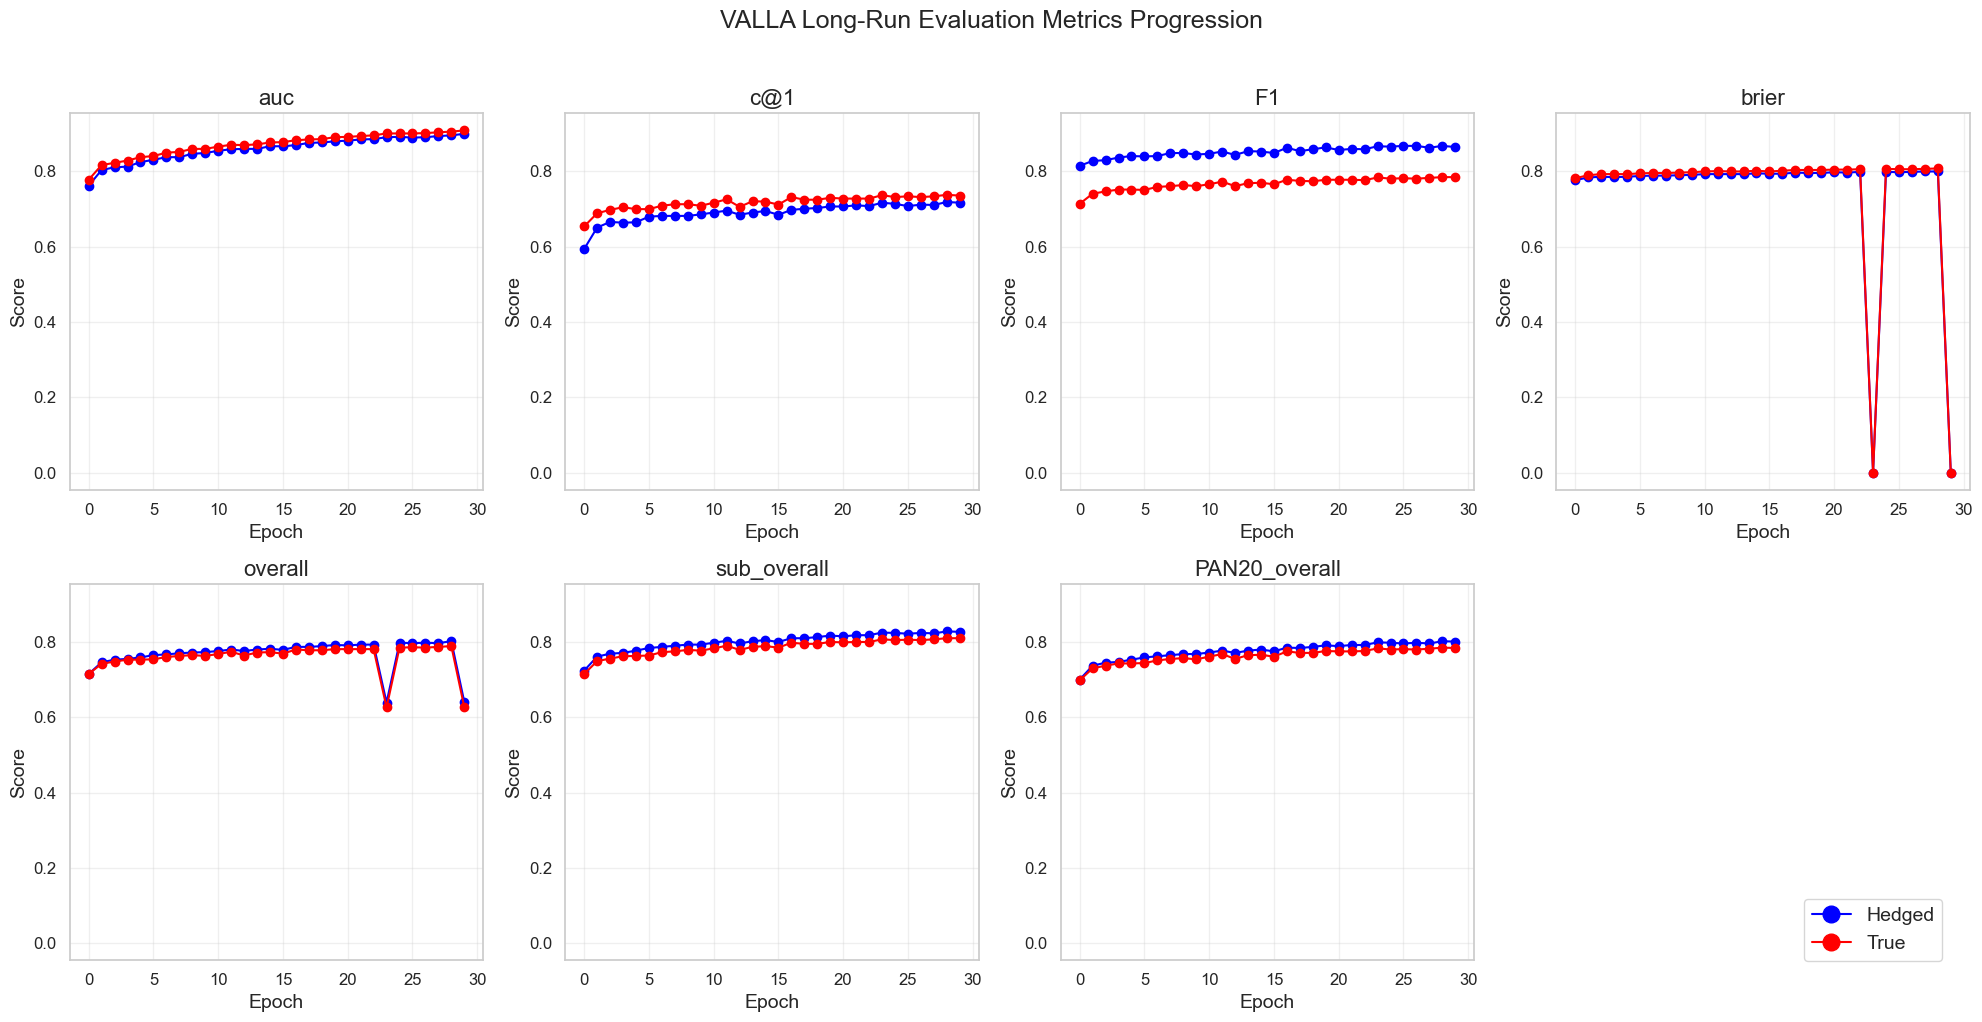

In [48]:
metrics = ['auc', 'c@1', 'F1', 'brier', 'overall', 'sub_overall', 'PAN20_overall']
plot_metrics(df_hedged, df_true, metrics, "VALLA Long-Run Evaluation Metrics Progression")